## Import Packages

In [22]:
import tensorflow as tf
#from tensorflow import keras

In [2]:
from tensorflow.keras.datasets import imdb # new!
from tensorflow.keras.preprocessing.sequence import pad_sequences # new!
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Embedding # new!
from tensorflow.keras.callbacks import ModelCheckpoint # new!
import os # new!
from sklearn.metrics import roc_auc_score, roc_curve # new!
import pandas as pd
import matplotlib.pyplot as plt # new!
%matplotlib inline

## Dense Layer

## Hyperparameters for Dense Layer Architecture
Setting up hyperparameters upfront is a good practice to enable experimentation 

In [3]:
# output directory name:
output_dir = 'model_output/dense'

# training:
epochs = 4 
batch_size = 128

# vector-space embedding:
n_dim = 64 # The number of dinemsions in our word vector space
n_unique_words = 5000 # Sort words based on the number of times they arrear and take top 5000
n_words_to_skip = 50 #Skip 50 most frequently appearing words as 
max_review_length = 100 #Truncate reviews longer that 100 words (pad shorter)
pad_type = trunc_type = 'pre' #Add padding at the begining 

# neural network architecture:
n_dense = 64 # Neuron in the dense layers
dropout = 0.5 # Regularization

## Data Load
Load the data

In [4]:
(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=n_unique_words, skip_top=n_words_to_skip)

In [6]:
x_train[0:3]

array([list([2, 2, 2, 2, 2, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 2, 173, 2, 256, 2, 2, 100, 2, 838, 112, 50, 670, 2, 2, 2, 480, 284, 2, 150, 2, 172, 112, 167, 2, 336, 385, 2, 2, 172, 4536, 1111, 2, 546, 2, 2, 447, 2, 192, 50, 2, 2, 147, 2025, 2, 2, 2, 2, 1920, 4613, 469, 2, 2, 71, 87, 2, 2, 2, 530, 2, 76, 2, 2, 1247, 2, 2, 2, 515, 2, 2, 2, 626, 2, 2, 2, 62, 386, 2, 2, 316, 2, 106, 2, 2, 2223, 2, 2, 480, 66, 3785, 2, 2, 130, 2, 2, 2, 619, 2, 2, 124, 51, 2, 135, 2, 2, 1415, 2, 2, 2, 2, 215, 2, 77, 52, 2, 2, 407, 2, 82, 2, 2, 2, 107, 117, 2, 2, 256, 2, 2, 2, 3766, 2, 723, 2, 71, 2, 530, 476, 2, 400, 317, 2, 2, 2, 2, 1029, 2, 104, 88, 2, 381, 2, 297, 98, 2, 2071, 56, 2, 141, 2, 194, 2, 2, 2, 226, 2, 2, 134, 476, 2, 480, 2, 144, 2, 2, 2, 51, 2, 2, 224, 92, 2, 104, 2, 226, 65, 2, 2, 1334, 88, 2, 2, 283, 2, 2, 4472, 113, 103, 2, 2, 2, 2, 2, 178, 2]),
       list([2, 194, 1153, 194, 2, 78, 228, 2, 2, 1463, 4369, 2, 134, 2, 2, 715, 2, 118, 1634, 2, 394, 2, 2, 119, 954, 189, 102, 2, 20

## Character Strings
The dataset is convinently stored as word vectors 

Checking the string reviews

In [7]:
word_index = keras.datasets.imdb.get_word_index()
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["PAD"] = 0
word_index["START"] = 1
word_index["UNK"] = 2
index_word = {v:k for k,v in word_index.items()}

In [8]:
' '.join(index_word[id] for id in x_train[0])

"UNK UNK UNK UNK UNK brilliant casting location scenery story direction everyone's really suited UNK part UNK played UNK UNK could UNK imagine being there robert UNK UNK UNK amazing actor UNK now UNK same being director UNK father came UNK UNK same scottish island UNK myself UNK UNK loved UNK fact there UNK UNK real connection UNK UNK UNK UNK witty remarks throughout UNK UNK were great UNK UNK UNK brilliant UNK much UNK UNK bought UNK UNK UNK soon UNK UNK UNK released UNK UNK UNK would recommend UNK UNK everyone UNK watch UNK UNK fly UNK UNK amazing really cried UNK UNK end UNK UNK UNK sad UNK UNK know what UNK say UNK UNK cry UNK UNK UNK UNK must UNK been good UNK UNK definitely UNK also UNK UNK UNK two little UNK UNK played UNK UNK UNK norman UNK paul UNK were UNK brilliant children UNK often left UNK UNK UNK UNK list UNK think because UNK stars UNK play them UNK grown up UNK such UNK big UNK UNK UNK whole UNK UNK these children UNK amazing UNK should UNK UNK UNK what UNK UNK done do

## Padding
Padding to standardize the lenght of reviews

In [38]:
x_train = pad_sequences(x_train, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)
x_valid = pad_sequences(x_valid, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)

In [10]:
x_train[14]

array([  52,  835, 1120,  542, 2603,    2, 1408,    2,    2, 2364,    2,
          2,    2,  276,    2,    2, 3239,    2,  129, 1642,    2,  607,
          2,    2,  852,    2,    2,    2,  605,  852, 3925,    2, 2777,
          2,  852,    2,    2, 2146,    2,  608, 4044,    2,    2,    2,
        789,    2,    2,    2,   54, 1544, 2173, 2018,    2,   79,   72,
        202,   72,    2,  968,    2,    2,    2, 2872,   75,  359, 2872,
          2,    2,    2,    2,   75,    2,    2,    2,    2,    2,    2,
        884, 1866,    2,    2, 4017, 2809,    2,    2,  719,    2,   70,
       2885,    2, 2552,    2, 4430,  175,    2,    2,    2,    2,  543,
       1609], dtype=int32)

## Dense Model

In [11]:
model = Sequential()
model.add(Embedding(n_unique_words,n_dim,input_length=max_review_length))
model.add(Flatten())
model.add(Dense(n_dense,activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 64)           320000    
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                409664    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 729,729
Trainable params: 729,729
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Compile model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [40]:
# training
model.fit(x_train,y_train,
         batch_size=batch_size, epochs=epochs, verbose=1,
         validation_data=(x_valid, y_valid))

Epoch 1/4
196/196 [==============================] - 27s 137ms/step - loss: 0.1082 - accuracy: 0.9635 - val_loss: 0.4698 - val_accuracy: 0.8384
Epoch 2/4
196/196 [==============================] - 27s 138ms/step - loss: 0.0629 - accuracy: 0.9801 - val_loss: 0.5514 - val_accuracy: 0.8348
Epoch 3/4
196/196 [==============================] - 26s 135ms/step - loss: 0.0431 - accuracy: 0.9865 - val_loss: 0.6592 - val_accuracy: 0.8324
Epoch 4/4
196/196 [==============================] - 27s 136ms/step - loss: 0.0285 - accuracy: 0.9900 - val_loss: 0.7170 - val_accuracy: 0.8329


In [16]:
y_hat = model.predict(x_valid)

In [17]:
' '.join(index_word[id] for id in all_x_valid[0])

NameError: name 'all_x_valid' is not defined

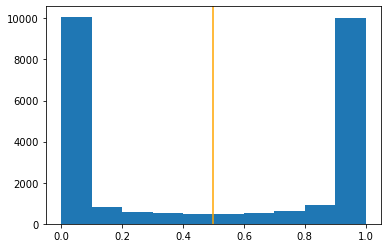

In [18]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [19]:
# looking at the AUC
pct_auc= roc_auc_score(y_valid,y_hat)*100.0
"{:0.2f}".format(pct_auc)

'91.57'

## Convolutional Network
CNNs are good at detecting spatial patterns. We can use it here here to detect spatial patterns between words

In [30]:
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from tensorflow.keras.layers import SpatialDropout1D

## Hyperparameters for CNN

In [41]:
# training
epochs = 4
batch_size = 128

# vector-space embedding:
n_dim = 64 # The number of dinemsions in our word vector space
n_unique_words = 5000 # Sort words based on the number of times they arrear and take top 5000
max_review_length = 400 #Truncate reviews longer that 100 words (pad shorter)
pad_type = trunc_type = 'pre' #Add padding at the begining 
drop_embed = 0.2

# convolutional architecture
n_conv = 256 # filters a.k.a kernels
k_conv = 3 #Kernel length

# desnse layer architecture
n_dense = 256
dropout = 0.2

In [42]:
# redo padding due the change in max review length
x_train = pad_sequences(x_train, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)
x_valid = pad_sequences(x_valid, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)

## CNN Model

In [43]:
model = Sequential()

# vector-space embedding
model.add(Embedding(n_unique_words,n_dim,
            input_length=max_review_length))
model.add(SpatialDropout1D(drop_embed))

#convolutional layer
model.add(Conv1D(n_conv, k_conv, activation='relu'))
model.add(GlobalMaxPooling1D())
# Global max-pooling is common for dimensionality reduction within deep learning NLP models
# We use it here to squash the activation map from 398 × 256 to 1 × 256.

#dense layer
model.add(Dense(n_dense, activation='relu'))
model.add(Dropout(dropout))

# output layer
model.add(Dense(1, activation='sigmoid'))

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 400, 64)           320000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 400, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 398, 256)          49408     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [45]:
# Compile model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [46]:
# training
model.fit(x_train,y_train,
         batch_size=batch_size, epochs=epochs, verbose=1,
         validation_data=(x_valid, y_valid))

Epoch 1/4
196/196 [==============================] - 27s 135ms/step - loss: 0.5175 - accuracy: 0.7292 - val_loss: 0.3752 - val_accuracy: 0.8292
Epoch 2/4
196/196 [==============================] - 26s 135ms/step - loss: 0.3216 - accuracy: 0.8637 - val_loss: 0.3460 - val_accuracy: 0.8468
Epoch 3/4
196/196 [==============================] - 26s 135ms/step - loss: 0.2374 - accuracy: 0.9044 - val_loss: 0.3582 - val_accuracy: 0.8476
Epoch 4/4
196/196 [==============================] - 26s 135ms/step - loss: 0.1660 - accuracy: 0.9373 - val_loss: 0.4026 - val_accuracy: 0.8416


In [37]:
x_train.shape

(25000, 100)

## RNN
RNNs can handle longer sequences rather than just looking at 3 words like with the above CNN filter

## Hyperparameters for RNNs

In [47]:
# training 
epochs = 16 # need more 
batch_size = 128

# vector space embedding
n_dim = 64
n_unique_words = 10000
max_review_length = 100 # lowered due to vanishing gradient over time
pad_type = trunc_type = 'pre'
drop_embed = 0.2

# RNN layer architecture

n_rnn = 256
drop_rnn = 0.2

## RNN model

In [50]:
from tensorflow.keras.layers import SimpleRNN

model = Sequential()
model.add(Embedding(n_unique_words,
                    n_dim, input_length=max_review_length))
model.add(SpatialDropout1D(drop_embed))
model.add(SimpleRNN(n_rnn, dropout=drop_rnn))
model.add(Dense(1, activation='sigmoid'))

In [51]:
# redo padding due the change in max review length
x_train = pad_sequences(x_train, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)
x_valid = pad_sequences(x_valid, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)

In [52]:
# Compile model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [53]:
# training
model.fit(x_train,y_train,
         batch_size=batch_size, epochs=epochs, verbose=1,
         validation_data=(x_valid, y_valid))

Epoch 1/16
196/196 [==============================] - 17s 88ms/step - loss: 0.6938 - accuracy: 0.5256 - val_loss: 0.6946 - val_accuracy: 0.5137
Epoch 2/16
196/196 [==============================] - 18s 90ms/step - loss: 0.6411 - accuracy: 0.6126 - val_loss: 0.6918 - val_accuracy: 0.5624
Epoch 3/16
196/196 [==============================] - 17s 89ms/step - loss: 0.5998 - accuracy: 0.6622 - val_loss: 0.5535 - val_accuracy: 0.7166
Epoch 4/16
196/196 [==============================] - 17s 89ms/step - loss: 0.5808 - accuracy: 0.6917 - val_loss: 0.6278 - val_accuracy: 0.6330
Epoch 5/16
196/196 [==============================] - 18s 90ms/step - loss: 0.5492 - accuracy: 0.7148 - val_loss: 0.4817 - val_accuracy: 0.7763
Epoch 6/16
196/196 [==============================] - 20s 103ms/step - loss: 0.5913 - accuracy: 0.6736 - val_loss: 0.6198 - val_accuracy: 0.6404
Epoch 7/16
196/196 [==============================] - 22s 111ms/step - loss: 0.5449 - accuracy: 0.7134 - val_loss: 0.5730 - val_accurac

The results are not good because the only place a Simple RNN architecture would perform well is if we have 10 or less consecutive timestamps of information relevant to our problem

## LSTM

## Hyperparameters for LSTM

In [55]:
# training
epochs = 4
batch_size =128

# vector space embedding
n_dim = 64
n_unique_words = 10000
max_review_length = 100
pad_type = trunc_type = 'pre'
drop_embed = 0.2

#LSTM architecture
n_lstm = 256
drop_lstm = 0.2

## LSTM Model

In [56]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(n_unique_words, n_dim,
                    input_length=max_review_length))
model.add(SpatialDropout1D(drop_embed))
model.add(LSTM(n_lstm, dropout=drop_lstm))
model.add(Dense(1, activation='sigmoid'))

In [57]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 64)           640000    
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 100, 64)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 256)               328704    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 968,961
Trainable params: 968,961
Non-trainable params: 0
_________________________________________________________________


In [58]:
# redo padding due the change in max review length
x_train = pad_sequences(x_train, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)
x_valid = pad_sequences(x_valid, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)

In [59]:
# Compile model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [60]:
# training
model.fit(x_train,y_train,
         batch_size=batch_size, epochs=epochs, verbose=1,
         validation_data=(x_valid, y_valid))

Epoch 1/4
196/196 [==============================] - 70s 359ms/step - loss: 0.5251 - accuracy: 0.7227 - val_loss: 0.3543 - val_accuracy: 0.8457
Epoch 2/4
196/196 [==============================] - 79s 403ms/step - loss: 0.3286 - accuracy: 0.8609 - val_loss: 0.3572 - val_accuracy: 0.8423
Epoch 3/4
196/196 [==============================] - 79s 403ms/step - loss: 0.2825 - accuracy: 0.8846 - val_loss: 0.3510 - val_accuracy: 0.8457
Epoch 4/4
196/196 [==============================] - 76s 390ms/step - loss: 0.2584 - accuracy: 0.8973 - val_loss: 0.3757 - val_accuracy: 0.8386


## Bi Directional LSTM

In [67]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional

model = Sequential()
model.add(Embedding(n_unique_words, n_dim,
                    input_length=max_review_length))
model.add(SpatialDropout1D(drop_embed))
model.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm)))
model.add(Dense(1, activation='sigmoid'))


In [68]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 64)           640000    
_________________________________________________________________
spatial_dropout1d_6 (Spatial (None, 100, 64)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 512)               657408    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 513       
Total params: 1,297,921
Trainable params: 1,297,921
Non-trainable params: 0
_________________________________________________________________


In [69]:
# Compile model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [70]:
# training
model.fit(x_train,y_train,
         batch_size=batch_size, epochs=epochs, verbose=1,
         validation_data=(x_valid, y_valid))

Epoch 1/4
196/196 [==============================] - 111s 564ms/step - loss: 0.5733 - accuracy: 0.6764 - val_loss: 0.3718 - val_accuracy: 0.8372
Epoch 2/4
196/196 [==============================] - 111s 568ms/step - loss: 0.3369 - accuracy: 0.8573 - val_loss: 0.3493 - val_accuracy: 0.8472
Epoch 3/4
196/196 [==============================] - 105s 535ms/step - loss: 0.2864 - accuracy: 0.8841 - val_loss: 0.3862 - val_accuracy: 0.8428
Epoch 4/4
196/196 [==============================] - 103s 526ms/step - loss: 0.2617 - accuracy: 0.8946 - val_loss: 0.3555 - val_accuracy: 0.8488


## Stacked RNNs

## Hyperparameters for stacked RNNs

In [74]:
#Stacked architecture
n_lstm_1 = 256 # neurons on the first RNN
n_lstm_2 = 512 # neurons on the second RNN
drop_lstm = 0.2

In [75]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional

model = Sequential()
model.add(Embedding(n_unique_words, n_dim,
                    input_length=max_review_length))
model.add(SpatialDropout1D(drop_embed))
model.add(Bidirectional(LSTM(n_lstm_1, dropout=drop_lstm,
                             return_sequences=True))) # new!
model.add(Bidirectional(LSTM(n_lstm_2, dropout=drop_lstm)))
model.add(Dense(1, activation='sigmoid'))

In [78]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 100, 64)           640000    
_________________________________________________________________
spatial_dropout1d_8 (Spatial (None, 100, 64)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 100, 512)          657408    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 1024)              4198400   
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 1025      
Total params: 5,496,833
Trainable params: 5,496,833
Non-trainable params: 0
_________________________________________________________________


In [79]:
# Compile model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [80]:
# training
model.fit(x_train,y_train,
         batch_size=batch_size, epochs=epochs, verbose=1,
         validation_data=(x_valid, y_valid))

Epoch 1/4
196/196 [==============================] - 675s 3s/step - loss: 0.5432 - accuracy: 0.7076 - val_loss: 0.3770 - val_accuracy: 0.8310
Epoch 2/4
196/196 [==============================] - 657s 3s/step - loss: 0.3257 - accuracy: 0.8614 - val_loss: 0.3478 - val_accuracy: 0.8458
Epoch 3/4
196/196 [==============================] - 655s 3s/step - loss: 0.2771 - accuracy: 0.8884 - val_loss: 0.3937 - val_accuracy: 0.8270
Epoch 4/4
196/196 [==============================] - 673s 3s/step - loss: 0.2456 - accuracy: 0.9030 - val_loss: 0.3819 - val_accuracy: 0.8396


## Multi-ConvNet

## Hyperparameters for Multi-ConvNet

In [81]:
# training:
epochs = 4
batch_size = 128

# vector-space embedding:
n_dim = 64
n_unique_words = 5000
max_review_length = 400
pad_type = trunc_type = 'pre'
drop_embed = 0.2

# convolutional layer architecture:
n_conv_1 = n_conv_2 = n_conv_3 = 256
k_conv_1 = 2
k_conv_2 = 3
k_conv_3 = 4

# dense layer architecture:
n_dense = 256
dropout = 0.2

In [89]:
# redo padding due the change in max review length
x_train = pad_sequences(x_train, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)
x_valid = pad_sequences(x_valid, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)

In [90]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, concatenate

#Input layer
input_layer = Input(shape=(max_review_length,), dtype='int16', name='input')

# embedding
embedding_layer = Embedding(n_unique_words, n_dim,
                            name='embedding')(input_layer)
drop_embed_layer = SpatialDropout1D(drop_embed,
                                    name='drop_embed')(embedding_layer)

# three convolutional layers
conv_1 = Conv1D(n_conv_1, k_conv_1,
                activation='relu',name='conv_1d')(drop_embed_layer)
maxp_1 = GlobalMaxPooling1D(name='maxp_1')(conv_1)

conv_2 = Conv1D(n_conv_2,k_conv_2, activation='relu', name='conv_2')(drop_embed_layer)
maxp_2 = GlobalMaxPooling1D(name='maxp_2')(conv_2)

conv_3 = Conv1D(n_conv_3,k_conv_3,activation='relu', name='conv_3')(drop_embed_layer)
maxp_3 = GlobalMaxPooling1D(name='maxp_3')(conv_3)

# Concatenate the activations from the three layers

concat = concatenate([maxp_1,maxp_2,maxp_3])

# dense hidden layer
dense_layer = Dense(n_dense, activation='relu', name='dense')(concat)
drop_dense_layer = Dropout(dropout, name='drop_dense')(dense_layer)

dense_2 = Dense(int(n_dense/4), activation='relu', name='dense_2')(drop_dense_layer)
dropout_2 = Dropout(dropout, name='drop_dense_2')(dense_2)

# sigmoid output layer
predictions = Dense(1, activation='sigmoid', name='output')(dropout_2)

# create model
model = Model(input_layer, predictions)

In [91]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 400)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 400, 64)      320000      input[0][0]                      
__________________________________________________________________________________________________
drop_embed (SpatialDropout1D)   (None, 400, 64)      0           embedding[0][0]                  
__________________________________________________________________________________________________
conv_1d (Conv1D)                (None, 399, 256)     33024       drop_embed[0][0]                 
_______________________________________________________________________________________

In [92]:
# Compile model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [93]:
# training
model.fit(x_train,y_train,
         batch_size=batch_size, epochs=epochs, verbose=1,
         validation_data=(x_valid, y_valid))

Epoch 1/4
196/196 [==============================] - 68s 344ms/step - loss: 0.5152 - accuracy: 0.7167 - val_loss: 0.3659 - val_accuracy: 0.8376
Epoch 2/4
196/196 [==============================] - 67s 344ms/step - loss: 0.3258 - accuracy: 0.8630 - val_loss: 0.3487 - val_accuracy: 0.8461
Epoch 3/4
196/196 [==============================] - 68s 346ms/step - loss: 0.2500 - accuracy: 0.9017 - val_loss: 0.3525 - val_accuracy: 0.8444
Epoch 4/4
196/196 [==============================] - 69s 350ms/step - loss: 0.1740 - accuracy: 0.9360 - val_loss: 0.4150 - val_accuracy: 0.8392
